In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# 1a

In [66]:
def tau(r,u):
    return np.log(1/u)/r

In [67]:
def expDistr(x,r):
    return r*np.exp(-r*x)

In [4]:
r =1
xs = np.linspace(0,10,100)


/home/mauro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


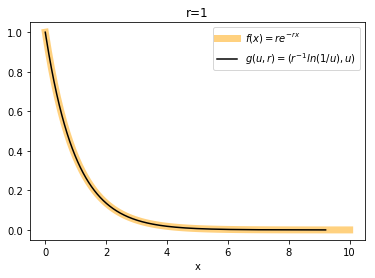

In [5]:
plt.plot(xs,expDistr(xs,r),c='orange',lw=7,alpha=0.5,label=r'$f(x)=re^{-rx}$')
u = np.linspace(0,1,10000)
plt.plot(tau(r,u),u,c='black',label = r"$g(u,r) = (r^{-1}ln(1/u),u)$")
plt.title("r=1")
plt.xlabel("x")

plt.legend()

# 1b

In [6]:
randoms= np.random.random(500)
vals = tau(10,randoms)

Text(0.5,1,'r=10')

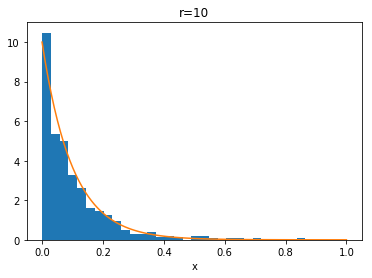

In [7]:
plt.hist(vals,bins=30,density=True)
plt.plot(np.linspace(0,1,100),expDistr(np.linspace(0,1,100),10))
plt.xlabel("x")
plt.title("r=10")

# 1c

In [126]:
r1 = np.random.random(10000)
r2 = np.random.random(10000)

vals1 = tau(10,r1)
vals2 = tau(5,r2)

# plt.hist(r1)


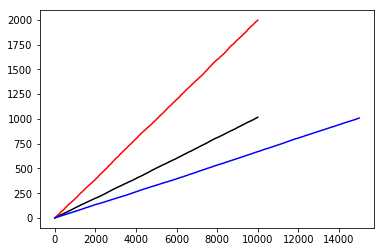

In [136]:
# both = np.concatenate([vals1,vals2])
c1 = np.cumsum(vals1)
c2 = np.cumsum(vals2)
plt.plot(c1,color='black')
plt.plot(c2,color='red')

both1 = np.concatenate([c2,c1])

both1.sort()
both1= both1[:-5000]
plt.plot((both1),color='blue')
both = []
for i in range(len(both1)-1):
    both.append(both1[i+1]-both1[i])
botht= np.array(both)


(array([9.434e+03, 3.511e+03, 1.285e+03, 4.900e+02, 1.740e+02, 6.500e+01,
        2.800e+01, 8.000e+00, 1.000e+00, 3.000e+00]),
 array([1.27410249e-06, 6.67965378e-02, 1.33591801e-01, 2.00387065e-01,
        2.67182329e-01, 3.33977592e-01, 4.00772856e-01, 4.67568120e-01,
        5.34363384e-01, 6.01158647e-01, 6.67953911e-01]),
 <a list of 10 Patch objects>)

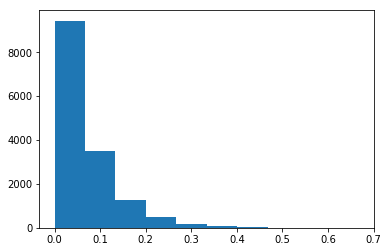

In [137]:
both = []
for i in range(len(both1)-1):
    both.append(both1[i+1]-both1[i])
# print(l[-1])
# print(r[-1])
# both = r-l
plt.hist(both)

0.10161132812499919 0.1996337890624993 0.06723632812499918


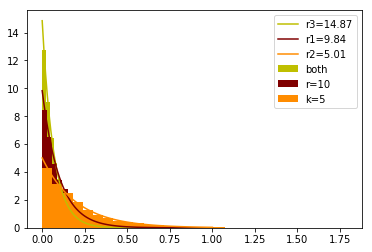

In [140]:

r1 = expon.fit(vals1,floc=0)[1]
r2 = expon.fit(vals2,floc=0)[1]
r3 = expon.fit(both,floc=0)[1]

print(r1,r2,r3)

xs = np.linspace(0.0001,1,100)


plt.hist(both,bins=30,label='both',density=True,color='y')
plt.plot(xs,expDistr(xs,r3**-1),label="r3={:.2f}".format(r3**-1),color='y')

plt.hist(vals1,bins=30,label='r=10',density=True,color='maroon')
plt.plot(xs,expDistr(xs,r1**-1),label="r1={:.2f}".format(r1**-1),color='maroon')
plt.hist(vals2,bins=30,label='k=5',density=True,color='darkorange')
plt.plot(xs,expDistr(xs,r2**-1),label="r2={:.2f}".format(r2**-1),color='darkorange')


# print(both)

plt.legend()
# plt.close()